# Objective
- To extract keywords during the first 10 days after Zambia recorded its first 2 cases
- To plot 25 keywords with the most frequency

In [1]:
#packages we will need to achieve our objectives
import pandas as pd
import utils

[nltk_data] Downloading package stopwords to /home/yas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#fetching our data
path = 'data/processed'
df = pd.read_csv(path+"/COVID19_ZM_transformedTweets.csv")
df.head(1)

,Unnamed: 0,id,username,text,created_at,date,retweets,hashtags,geo,Sentiment,SentimentClass
0,0,1260707670950137856,COVID19_bot,"Evolution of cases in Botswana, Burundi, Centr...",2020-05-13 23:05:06+00:00,2020-05-13,1,NaN,NaN,0.133333,Positive


In [3]:
#renaming the date column to created_at
df['created_at'] =  pd.to_datetime(df['date'])
#extracting the date from the created at column and making a date column
df['date'] =  pd.to_datetime(df['created_at']).dt.date
df.head(1)

,Unnamed: 0,id,username,text,created_at,date,retweets,hashtags,geo,Sentiment,SentimentClass
0,0,1260707670950137856,COVID19_bot,"Evolution of cases in Botswana, Burundi, Centr...",2020-05-13,2020-05-13,1,NaN,NaN,0.133333,Positive


In [69]:
#Specifying dates for extracting tweets
start_date = "2020-03-15"
stop_date = "2020-03-25"

#Words we dont regard as keywords
meanless_words=['rt','wa','read','chilufya','world','already','day','would','think','fight','de','people','south','http','https','www','due','says','total','take','amp','dr','com', \
                    'today','health','minister','morning','records','w','covid_19','like','na','covid19zambia', \
                    'covid-19','zambia','see','covid','coronavirus','sudan','zambian','country','help','crisis', \
                    'via','us','days','chng','cases','zedtwitter','lungu','case','first','countries','even','ya','la','get',\
                    'two','medical','amid','nigeria','global','outbreak','must','confirm','confirmed','virus',\
                   'time','kenya','one','covid19','africa','news','update','edgar','let','confirms','many', \
                    'ministry','live','zimbabwe','corona','botswana', 'burundi','need', 'central' ,'african','republic', 'cote','ivoire', \
                'eritrea','tests','ethiopia', 'kenya', 'malawi', 'mozambique','want', 'namibia', \
                    'rwanda','deaths','president','south','gambia','follow','town','africa','100th','igshid', \
                    'eswatini','recorded','uganda','24hrs','new','pandemic','please','records','march','testing',
                   'nation','number','edgarclungu','far','hope','tanzania','facebook','reach','still','liberia','p','angola','positive','could','instagram']

#getting tweets within a specific range
get_tweets=utils.get_tweet_for_specific_range(start_date,stop_date,df)

#Extracting only the text column from the tweets
tweet_txt=get_tweets["text"]

#Merging the entire text column so it becomes one corpus
merged_text_col=utils.merge_df_col_val(tweet_txt)

#Removing the RT username from the tweets
remove_RT_from_text=utils.remove_RT(merged_text_col)

#Removing all punctuation marks from the tweets
punct_rmvd_from_txt=utils.remove_punct_marks(merged_text_col)

#removing works that have no meaning such as is, as , the from the text
stp_wrds_rmvd_from_txt=utils.remove_stop_words(punct_rmvd_from_txt)

#Removing the words that have meaning but not considered keywords
meanless_wrds_rmvd_from_txt=utils.remove_meaninglesswords(stp_wrds_rmvd_from_txt,meanless_words)

#Removing numbers frm the text
rmv_numbers_from_txt=utils.remove_numeric(meanless_wrds_rmvd_from_txt)

In [70]:
#The goal here is to come up with a list of keywords with their \
# corresponding frequency

import matplotlib.pyplot as plt
import seaborn as sns
import nltk

%matplotlib inline

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')

tweet_txt=rmv_numbers_from_txt
words=tweet_txt.split(" ")
nlp_words=nltk.FreqDist(words).most_common(25)

df_freq=pd.DataFrame(nlp_words, columns=['word', 'frequency'])
df_freq.head()

,word,frequency
0,close,99
1,borders,93
2,airport,77
3,sign,68
4,petition,65


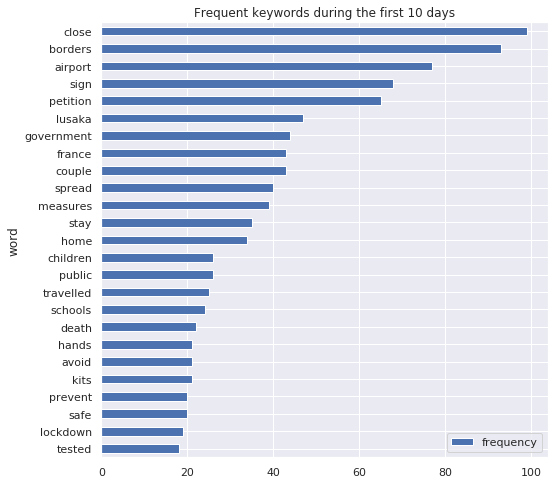

In [71]:
#Finally we plot the most frequent words

fig,ax=plt.subplots(figsize=(8,8))

df_freq.sort_values(by='frequency').plot.barh(x="word",y="frequency",ax=ax)
ax.set_title("Frequent keywords during the first 10 days")
plt.show()

In [72]:
remove_RT_from_text

'zambia: update on coronavirus (covid-19) quarantine and borders (‘summary’, ‘coronavirus’ and ‘return to the uk’ pages) #traveladvice https://www.travelmoneyfinder.com/index.php#fco-1585177826well i mean no harm but you can really talk yet not been able to give solutions. i notice lots off post and if you love zambia why do you isolate yourself to give the best advise....i represent no part any party but you have been like corona virus in isolatnministry of health zambia: zambia must close all borders and airport amid covid-19 - sign the petition! http://chng.it/xgdns5yc via act now patriotic front is worse then covid -19,we are slowly losing our country\'s sovereignty while others chant for their continuity of leadership. pf is indeed the worst government ever ruled in zambia and probably will be the last, 2021 vote wisely.probably he’s also very concerned about this horrible corona virus .this is time we should fight together and pray together as one zambia one nationchina’s coronav